将列式数据变成二维交叉形式，便于分析，叫做重塑或透视

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(
    "C:/Users/THE KEY/Desktop/python_datum/pandas/data/myself_data/movies/ratings.csv",
    sep = ",",
    engine = "python"
)

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# pandas的日期处理功能，s是秒的意思
df["pdate"] = pd.to_datetime(df["timestamp"], unit = 's')

In [5]:
df.head()

,userId,movieId,rating,timestamp,pdate
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [6]:
df.dtypes

userId                int64
movieId               int64
rating              float64
timestamp             int64
pdate        datetime64[ns]
dtype: object

In [7]:
# 实现数据统计
df_group = df.groupby([df["pdate"].dt.month,"rating"])["userId"].agg(pv = np.sum)

C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13200\4048528412.py:2: FutureWarning: The provided callable <function sum at 0x000001E3A8345940> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group = df.groupby([df["pdate"].dt.month,"rating"])["userId"].agg(pv = np.sum)


In [8]:
df_group.head(25)

pv
pdate rating        
1     0.5      45106
      1.0      84054
      1.5      36978
      2.0     181774
      2.5     114794
      3.0     580822
      3.5     432974
      4.0     825315
      4.5     236725
      5.0     311858
2     0.5      63748
      1.0      81132
      1.5     115553
      2.0     246067
      2.5     240928
      3.0     432050
      3.5     441725
      4.0     603443
      4.5     231043
      5.0     224719
3     0.5      65877
      1.0     127254
      1.5      78754
      2.0     254947
      2.5     189270

### ----------------------------------------------------------------

In [9]:
# 使用unstack实现数据二维透视,它把其中一个行变成了列
df_stack = df_group.unstack()
df_stack

pv                                                                  \
rating    0.5     1.0     1.5     2.0     2.5     3.0     3.5     4.0     4.5   
pdate                                                                           
1       45106   84054   36978  181774  114794  580822  432974  825315  236725   
2       63748   81132  115553  246067  240928  432050  441725  603443  231043   
3       65877  127254   78754  254947  189270  515313  384724  764896  241519   
4       31441   45230   36546  178163  117785  463861  325113  668856  272687   
5       93757  103003   97450  257897  270285  843592  572013  960825  325487   
6       28452   63545  107131  279448  422507  794088  421082  685841  230985   
7       11918   63799   29295  134835  123159  462269  327703  665219  180968   
8       27957  111849   56705  263665  134243  604629  262305  684650  177946   
9       19588   42181   38042  153574  115818  418245  371552  742834  260640   
10      11643   72615   18179  168516   61308  420228  240829  542272  148711   
11      42633   72473   41736  164579  153056  590773  410212  898938  264521   
12      16195   59888   18118  172556   75304  422458  238602  548495  123454   

                
rating     5.0  
pdate           
1       311858  
2       224719  
3       361481  
4       367348  
5       410345  
6       391211  
7       283969  
8       390560  
9       293377  
10      272467  
11      467861  
12      312468

<Axes: xlabel='pdate'>

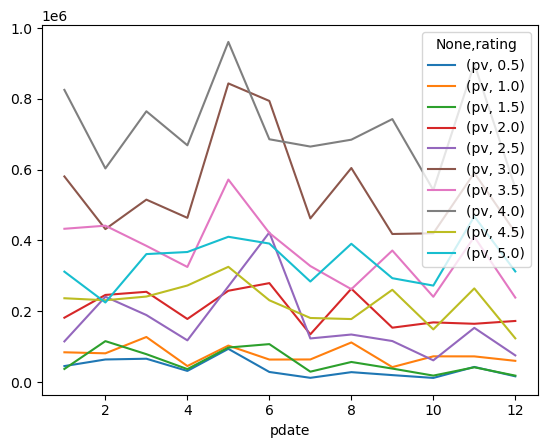

In [10]:
df_stack.plot()

In [11]:
# unstack和stack是互逆操作，stack就是把列变成行
df_stack.stack()
df_stack

C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13200\3012778575.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stack.stack()


pv                                                                  \
rating    0.5     1.0     1.5     2.0     2.5     3.0     3.5     4.0     4.5   
pdate                                                                           
1       45106   84054   36978  181774  114794  580822  432974  825315  236725   
2       63748   81132  115553  246067  240928  432050  441725  603443  231043   
3       65877  127254   78754  254947  189270  515313  384724  764896  241519   
4       31441   45230   36546  178163  117785  463861  325113  668856  272687   
5       93757  103003   97450  257897  270285  843592  572013  960825  325487   
6       28452   63545  107131  279448  422507  794088  421082  685841  230985   
7       11918   63799   29295  134835  123159  462269  327703  665219  180968   
8       27957  111849   56705  263665  134243  604629  262305  684650  177946   
9       19588   42181   38042  153574  115818  418245  371552  742834  260640   
10      11643   72615   18179  168516   61308  420228  240829  542272  148711   
11      42633   72473   41736  164579  153056  590773  410212  898938  264521   
12      16195   59888   18118  172556   75304  422458  238602  548495  123454   

                
rating     5.0  
pdate           
1       311858  
2       224719  
3       361481  
4       367348  
5       410345  
6       391211  
7       283969  
8       390560  
9       293377  
10      272467  
11      467861  
12      312468

### ----------------------------------------------------------------------

In [12]:
# 使用pivot简化透视，是简化的写法
df_reset = df_group.reset_index()
df_reset.head(20)

,pdate,rating,pv
0,1,0.5,45106
1,1,1.0,84054
2,1,1.5,36978
3,1,2.0,181774
4,1,2.5,114794
5,1,3.0,580822
6,1,3.5,432974
7,1,4.0,825315
8,1,4.5,236725
9,1,5.0,311858


In [13]:
df_pivot = df_reset.pivot(index = "pdate",columns = "rating",values = "pv")

In [14]:
df_pivot.head(10)

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
pdate,,,,,,,,,,
1,45106,84054,36978,181774,114794,580822,432974,825315,236725,311858
2,63748,81132,115553,246067,240928,432050,441725,603443,231043,224719
3,65877,127254,78754,254947,189270,515313,384724,764896,241519,361481
4,31441,45230,36546,178163,117785,463861,325113,668856,272687,367348
5,93757,103003,97450,257897,270285,843592,572013,960825,325487,410345
6,28452,63545,107131,279448,422507,794088,421082,685841,230985,391211
7,11918,63799,29295,134835,123159,462269,327703,665219,180968,283969
8,27957,111849,56705,263665,134243,604629,262305,684650,177946,390560
9,19588,42181,38042,153574,115818,418245,371552,742834,260640,293377


<Axes: xlabel='pdate'>

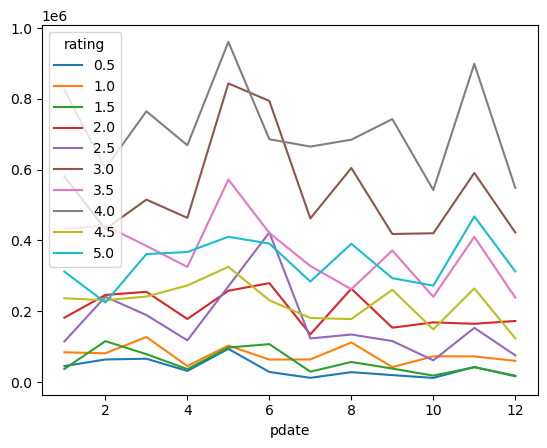

In [15]:
df_pivot.plot()